# SugarTS example
This is quick tutorial on how to engage with the sugarTS package.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta

import pandas as pd
import numpy as np
import plotly.graph_objects as go

from sugarTS.model import Patient

/Users/arcuate/anaconda3/envs/3p8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
# create a patient object
patient = Patient()

In [27]:
# fit the model to the patient's data
patient.fit_model()

In [34]:
# decide on meal (how many carbs? when?)
current_time = patient.ytest.index[-1]
carb_time = current_time + timedelta(minutes=30)
carbs = 40

# calculate the optimal bolus
optimal = patient.find_optimal_bolus(carbs, carb_time)
print('Current time is {}'.format(current_time))
print('Give yourself a bolus of ' + str(optimal['bolus amount']) +
      ' units at ' + str(optimal['bolus time']))

Current time is 2020-04-22 10:35:00
Give yourself a bolus of 27 units at 2020-04-22 10:40:00


In [40]:
# plot the model forecast for the optimal bolus
bolus = optimal['bolus amount']
bolus_t = optimal['bolus time']
x_future = patient.build_x_future(carbs, carb_time, bolus, bolus_t)
y_ind = pd.date_range(start=x_future.index[0], 
                     end=x_future.index[-1]+timedelta(minutes=5),
                     freq='5T')
ypred = pd.Series(patient.forecast(x_future), index=y_ind)

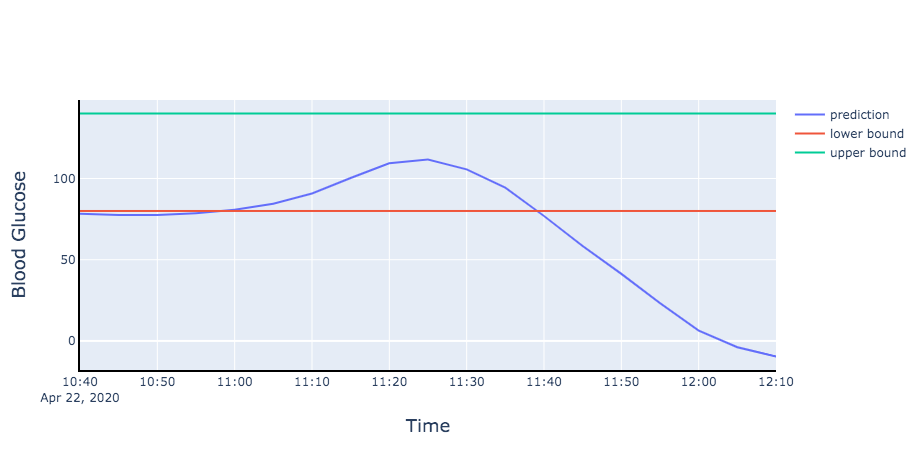

In [46]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=y_ind,
        y=ypred,
        mode='lines',
        name='prediction')
    )
fig.add_trace(
    go.Scatter(
        x=y_ind,
        y=np.ones(len(y_ind))*patient.target_range[0],
        mode='lines',
        name='lower bound')
    )
fig.add_trace(
    go.Scatter(
        x=y_ind,
        y=np.ones(len(y_ind))*patient.target_range[1],
        mode='lines',
        name='upper bound')
    )
fig.update_xaxes(
    title_text='Time',
    title_font=dict(size=18),
    showline=True, 
    linewidth=2, 
    linecolor='black')
fig.update_yaxes(
    title_text='Blood Glucose', 
    title_font=dict(size=18),
    showline=True, 
    linewidth=2, 
    linecolor='black')
fig.show()

In [10]:
!pip install jupyter-dash

     |████████████████████████████████| 49 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 94 kB 5.2 MB/s eta 0:00:011
     |████████████████████████████████| 71 kB 20.9 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 5.0 MB/s  eta 0:00:01
  Using cached itsdangerous-1.1.0-py2.py3-none-any.whl (16 kB)
     |████████████████████████████████| 298 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 29.2 MB/s eta 0:00:01
     |████████████████████████████████| 188 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 21.3 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 35.3 MB/s eta 0:00:01
     |████████████████████████████████| 421 kB 28.5 MB/s eta 0:00:01
  Created wheel for ansi2html: filename=ansi2html-1.5.2-py3-none-any.whl size=13860 sha256=ba07c550b1efebe8206d58f816a77fc3b2bb6a3d316a1b982995dddfc13923f6
  Stored in directory: /Us

In [12]:
!jupyter lab build

[LabBuildApp] JupyterLab 2.1.1
[LabBuildApp] Building in /Users/arcuate/anaconda3/envs/3p8/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (build:prod:minimize)


In [9]:
!jupyter labextension list

JupyterLab v2.1.1
Known labextensions:
   app dir: /Users/arcuate/anaconda3/envs/3p8/share/jupyter/lab
        @jupyter-widgets/jupyterlab-manager v2.0.0  enabled  OK
        @jupyterlab/toc v3.0.0  enabled  OK
        jupyter-matplotlib v0.7.3  enabled  OK
        jupyterlab-dash v0.3.0  enabled  OK
